In [5]:
#importing numpy
import numpy as np

# importing matplotlib to perform figures
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [6]:

list_temp=[]
list_PC=[]
list_PE=[]
counter=0
file = open('RMN_31P_fit_51_PEPC.csv', "r")

for line in file.readlines():

    if counter > 0:
        line_values = line.split()
        values = [float(x) for x in line_values]
        list_temp.append(int(values[0]))
        list_PC.append(values[1])
        list_PE.append(values[2])        
    counter=counter+1


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


[314.47172632   0.32793575 100.79961072]
[310.64538198   0.36787695  88.26514755]


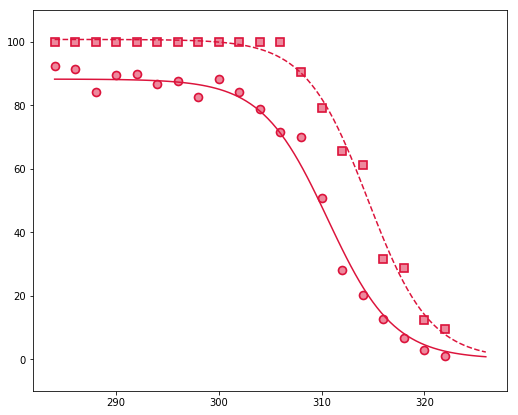

In [7]:
xdata = np.linspace(284, 326, 100)

def sigmoid(x, xo,k, A):
    y = A-A/(1+ np.exp(-k*(x-xo)))
    return y

p_start1=[284,0.3,120]
p_start2=[284,0.3,80]

list_err=[5] * len(list_temp)

popt1, pcov1 = curve_fit(sigmoid, list_temp, list_PC, p0=p_start1, sigma=list_err)
popt2, pcov2 = curve_fit(sigmoid, list_temp, list_PE, p0=p_start2, sigma=list_err)


print popt1
print popt2

fig = plt.figure(figsize=(8.5, 7))
ax = fig.add_subplot(111)

#ax.plot(xdata, sigmoid(xdata, *popt1), "--", color='#56b4e9')
ax.plot(xdata, sigmoid(xdata, *[314.5,0.33,100.8]), "--", color='#DC143C')
ax.plot(list_temp, list_PC,'s', markersize=8, mew='1.5', color='#DC143C',alpha=0.5)
ax.plot(list_temp, list_PC,'s', markersize=8, mfc='none', mew='1.5', color='#DC143C')


#ax.plot(xdata, sigmoid(xdata, *popt2), "-", color='#009e73')
ax.plot(xdata, sigmoid(xdata, *[310.6,0.31,88.3]), "-", color='#DC143C')
ax.plot(list_temp, list_PE,'o', markersize=8, mew='1.5', color='#DC143C',alpha=0.5)
ax.plot(list_temp, list_PE,'o', markersize=8, mfc='none', mew='1.5', color='#DC143C')


plt.ylim(-10,110)

fig.savefig("51PEPC_fit.svg", dpi=200)